## Assignment 

In [5]:
import yfinance as yf 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

Task 1

In [7]:
mdf = yf.download('MSFT')
adf = yf.download('AAPL')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
adf = adf.reset_index('Date');
mdf = mdf.reset_index('Date');

In [19]:
mdf.head()

Price,Date,Close,High,Low,Open,Volume
0,1986-03-13,0.059707,0.062373,0.054376,0.054376,1031788800
1,1986-03-14,0.061839,0.062906,0.059707,0.059707,308160000
2,1986-03-17,0.062906,0.063439,0.061839,0.061839,133171200
3,1986-03-18,0.061306,0.063439,0.060773,0.062906,67766400
4,1986-03-19,0.060240,0.061839,0.059707,0.061306,47894400


In [25]:
adf.head()

Price,Date,Close,High,Low,Open,Volume
0,1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1,1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
2,1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
3,1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
4,1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600


In [27]:
adf = adf.set_index('Date');
mdf = mdf.set_index('Date');

In [29]:
mdf = mdf.loc['2020-01-01':'2023-01-01']
adf = adf.loc['2020-01-01':'2023-01-01']

In [35]:
df = pd.merge(mdf,adf, on= 'Date', how = 'left' )

In [58]:
mdf.head();

In [60]:
df.head();

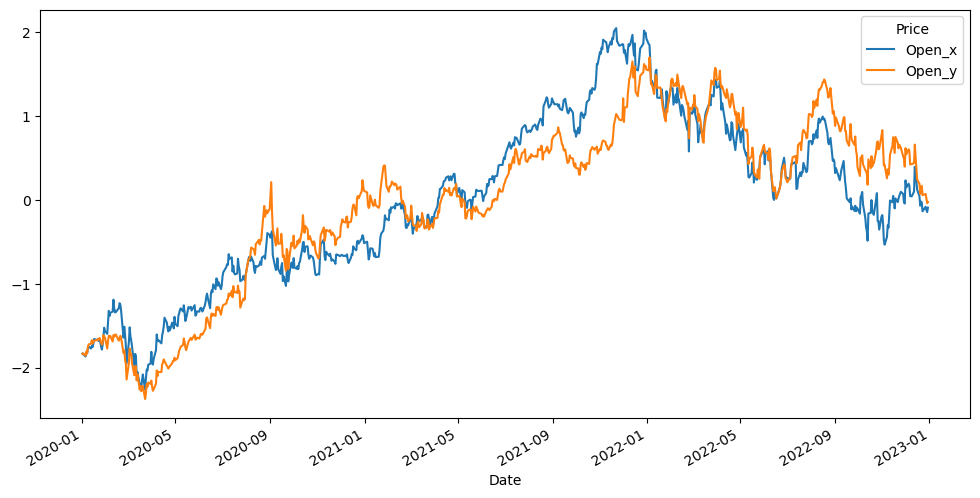

In [52]:
df[['Open_x','Open_y']].plot(figsize=(12,6))
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Open_x'] = sc.fit_transform(df[['Open_x']])
df['Open_y'] = sc.fit_transform(df[['Open_y']])

In [66]:
df = df.rename(columns = {'Close_x':'Close_m', 'High_x':'High_m', 'Low_x':'Low_m', 'Open_x':'Open_m', 'Volume_y':'Volume_a','Close_y':'Close_a', 'High_y':'High_a', 'Low_y':'Low_a', 'Open_y':'Open_a', 'Volume_y':'Volume_a'})

In [68]:
df.columns

Index(['Close_m', 'High_m', 'Low_m', 'Open_m', 'Volume_x', 'Close_a', 'High_a',
       'Low_a', 'Open_a', 'Volume_a'],
      dtype='object', name='Price')

In [82]:
df[['Open_m', 'Open_a']].corr()

Price,Open_m,Open_a
Price,,
Open_m,1.00000,0.91623
Open_a,0.91623,1.00000


In [148]:
# Monthly correlation
df.resample('ME').apply(lambda x: x[['Open_m', 'Open_a']].corr().iloc[0,1]).apply(lambda x: x > 0.7).sum()

26